In [49]:
#imported police data shooting from Washington Post Data
import pandas as pd
import numpy as np
import datetime as dt 
import seaborn as sns
import scipy.stats as stats
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

#the first thing done after import different things we will be using is brining in the data to be analyzed.
shooting_data = pd.read_csv('C:\\Users\\mukta\\Downloads\police_shooting.csv')

#I just showed the first few of rows of the data to present all the columns and show what it looks like.
shooting_data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,1/2/2015,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,1/2/2015,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,1/3/2015,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,1/4/2015,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,1/4/2015,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


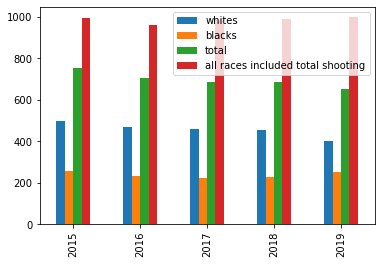

In [99]:
#The next step would be analyzing the data
#The first thing to do here is see the trend of increasing Police shootings between white and blacks 
#and total between them and all races from 2015-2019.
#We are only going to 2019 just for this part as the 2020 graph might throw off the way it looks since its not over yet
#I used datetime index in order to get just the years from the the date that was given.
shooting_data = pd.DataFrame(shooting_data)
shooting_data['year']=pd.DatetimeIndex(shooting_data['date']).year

#Once we have the year, I specifically want to just look at data between Whites and Blacks
#In order to find the total number of shootings within a year I searched all data found within that year and took the length
shooting_2015 = len(shooting_data[shooting_data['year']==2015])
shooting_2016 = len(shooting_data[shooting_data['year']==2016])
shooting_2017 = len(shooting_data[shooting_data['year']==2017])
shooting_2018 = len(shooting_data[shooting_data['year']==2018])
shooting_2019 = len(shooting_data[shooting_data['year']==2019])

#Next I needed to find the total number of shoothings within a year and a race and thus I just added the race (Black and White)
shooting_2015_w = len(shooting_data[(shooting_data['year']==2015) & (shooting_data['race']=='W')])
shooting_2016_w = len(shooting_data[(shooting_data['year']==2016) & (shooting_data['race']=='W')])
shooting_2017_w = len(shooting_data[(shooting_data['year']==2017) & (shooting_data['race']=='W')])
shooting_2018_w = len(shooting_data[(shooting_data['year']==2018) & (shooting_data['race']=='W')])
shooting_2019_w = len(shooting_data[(shooting_data['year']==2019) & (shooting_data['race']=='W')])
shooting_2015_b = len(shooting_data[(shooting_data['year']==2015) & (shooting_data['race']=='B')])
shooting_2016_b = len(shooting_data[(shooting_data['year']==2016) & (shooting_data['race']=='B')])
shooting_2017_b = len(shooting_data[(shooting_data['year']==2017) & (shooting_data['race']=='B')])
shooting_2018_b = len(shooting_data[(shooting_data['year']==2018) & (shooting_data['race']=='B')])
shooting_2019_b = len(shooting_data[(shooting_data['year']==2019) & (shooting_data['race']=='B')])

#Since I want to look at the total number of shootings of White and Black compared to others I did the total
total_2015 = shooting_2015_w + shooting_2015_b
total_2016 = shooting_2016_w + shooting_2016_b
total_2017 = shooting_2017_w + shooting_2017_b
total_2018 = shooting_2018_w + shooting_2018_b
total_2019 = shooting_2019_w + shooting_2019_b

#Now that I have everything I want in my graph I just put them together in a list to input when I graph
whites = [shooting_2015_w,shooting_2016_w,shooting_2017_w,shooting_2018_w,shooting_2019_w]
blacks = [shooting_2015_b,shooting_2016_b,shooting_2017_b,shooting_2018_b,shooting_2019_b]
total = [total_2015, total_2016, total_2017, total_2018, total_2019]
total_with_all_race = [shooting_2015, shooting_2016, shooting_2017, shooting_2018, shooting_2019]
index = ['2015','2016','2017','2018','2019']

#I thought using a whole dataframe to graph my bar graph is good since it would be color coded, and easy to input everything
policeshootings = pd.DataFrame({'whites': whites,'blacks': blacks, 'total': total,'all races included total shooting': 
                   total_with_all_race} , index=index)

policeshootings.plot.bar()

The number of people from each race that have been killed by Police starting 2015:
W    2555
B    1329
H     930
A      93
N      79
O      47
Name: race, dtype: int64


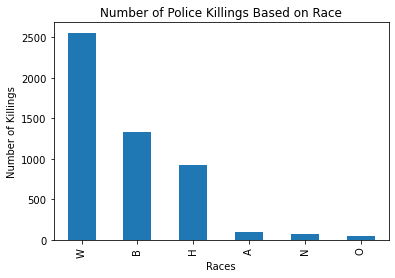

In [100]:
#Next the objective was to see the amount of white,black, hispanic, asian, native that were shot by police from 2015-2020
#This will be shown with a bar graph

race = shooting_data['race'].value_counts()
print("The number of people from each race that have been killed by Police starting 2015:")
print(race)
plt.title('Number of Police Killings Based on Race')
plt.xlabel('Races')
plt.ylabel('Number of Killings')
race.plot.bar()


The number of White people Killed by police per million of their population is:  12.969543147208121
The number of Black people Killed by police per million of their population is:  32.10144927536232
Black People are most likely to get killed more than White people at a rate of:  2.4751410987265667 %


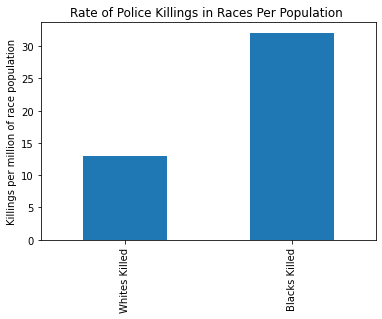

In [136]:
#We will now just focus on White and Black Races
#The objective next will require us to use the number of white people and the number of black people that were killed
#by police and to use the number from the frequency generated I created a dictionary 'killing_per_race'
#using the frequency output

killing_per_race = shooting_data['race'].value_counts().to_dict()

#Since White and Black are the two most races that are killed by police we will focus our study on them
#Next we are checking the number of White and Blacks are killed per their population amount and comparing them.
#Got the total number populations from Google

total_white_population = 197000000
total_black_population = 41400000

#used the dictionary 'killing_per_race' and the total number of populations of the White and Black race
#in order to find the total number of police killing on both races compared to their population
#once we got that we needed to find the difference between the rate of Black and White killings by police

number_of_white_killed = killing_per_race['W']
number_of_black_killed = killing_per_race['B']

white_killed_per_million = (number_of_white_killed/total_white_population)*(10**6)
black_killed_per_million = (number_of_black_killed/total_black_population)*(10**6)

print('The number of White people Killed by police per million of their population is: ', white_killed_per_million)
print('The number of Black people Killed by police per million of their population is: ', black_killed_per_million)

rate_difference = black_killed_per_million/white_killed_per_million
print('Black People are most likely to get killed more than White people at a rate of: ', rate_difference , '%')

races_killed_per_million = {'Whites Killed': white_killed_per_million,'Blacks Killed': black_killed_per_million}
races_killed_per_million_graph = pd.Series(races_killed_per_million)

plt.title('Rate of Police Killings in Races Per Population ')
plt.ylabel('Killings per million of race population')
races_killed_per_million_graph.plot.bar()

Number of unarmed White people shot by poolice:  147
Number of unarmed Black people shot by poolice:  125
Out of the 2555 White people killed 5.7534246575342465 % were killed unarmed
Out of the 1329 Black people killed 9.405568096313017 % were killed unarmed


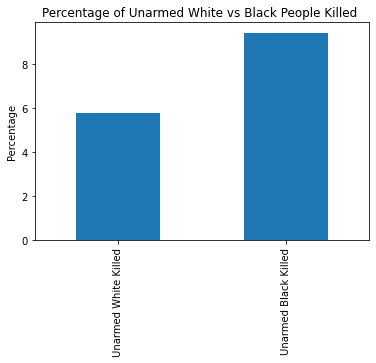

In [102]:
#We have shown that the rate of Balck People shot by police is higher than those of White people. 
#Now I would like to show the situations in which each race was killed. 
#The first comparison we would be making is out of the White and Black people killed by police what percent was unarmed

white_unarmed = len(shooting_data[(shooting_data['armed']=='unarmed') & (shooting_data['race']=='W')])
print('Number of unarmed White people shot by poolice: ', white_unarmed)
black_unarmed = len(shooting_data[(shooting_data['armed']=='unarmed') & (shooting_data['race']=='B')])
print('Number of unarmed Black people shot by poolice: ', black_unarmed)

percent_white_unarmed = (white_unarmed/number_of_white_killed)*100
percent_black_unarmed = (black_unarmed/number_of_black_killed)*100
print('Out of the', number_of_white_killed, 'White people killed', percent_white_unarmed, '% were killed unarmed')
print('Out of the', number_of_black_killed, 'Black people killed', percent_black_unarmed, '% were killed unarmed')

percent_unarmed_killed = {'Unarmed White Killed': percent_white_unarmed, 'Unarmed Black Killed': percent_black_unarmed}
percent_unarmed_killed_graph = pd.Series(percent_unarmed_killed)
plt.title('Percentage of Unarmed White vs Black People Killed ')
plt.ylabel('Percentage')
percent_unarmed_killed_graph.plot.bar()

The number of White people 20 and under that were killed by Police: 112
The number of Black people 20 and under that were killed by Police: 155
Out of the 2555 there were 112 that were 20 years or younger, that gives a 4.383561643835616 % of the total killed to be 20 or younger
Out of the 1329 there were 155 that were 20 years or younger, that gives a 11.662904439428141 % of the total killed to be 20 or younger


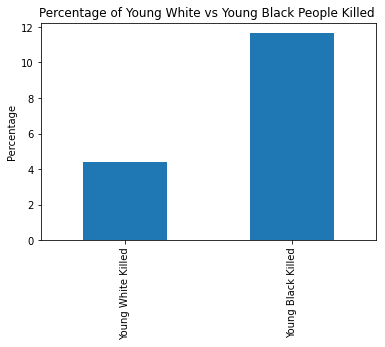

In [135]:
#Next I want to show that Police are more likely to kill African Americans at a younger age than they are a white person. 
#Let's take the age of 20 and see what percentage of all those killed starting 2015 were 20 or younger for both races

#We got the number of people age 20 or younger by calling the rows the specified things like white and under 20 or black
#and under 20

young_white_killed = len(shooting_data[(shooting_data['age']<=20)&(shooting_data['race']=='W')])
print('The number of White people 20 and under that were killed by Police:', young_white_killed)
young_black_killed = len(shooting_data[(shooting_data['age']<=20)&(shooting_data['race']=='B')])
print('The number of Black people 20 and under that were killed by Police:', young_black_killed)


#Found the percent of the amount of kids from the total amount by just dividing and multiplying by 100

percent_young_white_killed = (young_white_killed/number_of_white_killed)*100
percent_young_black_killed = (young_black_killed/number_of_black_killed)*100

print('Out of the', number_of_white_killed, 'there were', young_white_killed, 'that were 20 years or younger, that gives a',
     percent_young_white_killed, '% of the total killed to be 20 or younger')
print('Out of the', number_of_black_killed, 'there were', young_black_killed, 'that were 20 years or younger, that gives a',
     percent_young_black_killed, '% of the total killed to be 20 or younger')


#Made a dictionary with the things I wanted in my graph, in this case the % of young white and black people and then made
#a graph using pd.Series for the results.
percent_young_killed = {'Young White Killed': percent_young_white_killed, 'Young Black Killed': percent_young_black_killed}
percent_young_killed_graph = pd.Series(percent_young_killed)
plt.title('Percentage of Young White vs Young Black People Killed ')
plt.ylabel('Percentage')
percent_young_killed_graph.plot.bar()

In [151]:
#For the conclusion we are going to check if Black people are indeed disproportinatlly killed and more unreasonably killed
#by Police. 
#I am going to do that using if else statements, wich a the end should give us whether our assumption was true or not.

if black_killed_per_million > white_killed_per_million:
    print('Black people are disproportinatly killed by Police. We will see what percent more Black people are killed than Whites')
    rate_difference = black_killed_per_million/white_killed_per_million
    print('Black people are killed at a', rate_difference, '% more than White people')
    if percent_black_unarmed > percent_white_unarmed:
        print('Black people are more likely to get killed while unarmed compared to White people')
    else: 
        end
        if percent_young_black_killed > percent_young_white_killed:
            print('More Black young pepople are more likely to get killed compared to young White people')
        else:
            end
else:
    print('Hypothesis not corret')
 


Black people are disproportinatly killed by Police. We will see what percent more Black people are killed than Whites
Black people are killed at a 2.4751410987265667 % more than White people
Black people are more likely to get killed while unarmed compared to White people
